<h3>Name: Manpreet Singh
<h3>UID: 20BCS6444
    
<h2>AIM: Model to predict Spam or not emails

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

<h3> Loading the Sapm_ham_dataset </h3>

In [2]:
df = pd.read_csv("D:\PYTHON\Python For Machine Learning\Data\\spam_ham_dataset.csv")
df.head(20)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


<h3> Dropping the 'Unnamed: 0' column

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.columns=['Label','Text','class']

<h3> Checking for null values in dataset if present

In [5]:
df.isnull().sum()

Label    0
Text     0
class    0
dtype: int64

In [6]:
df.head()

,Label,Text,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


<h3> Our dataset has 5171 rows and 3 Columns

In [7]:
df.shape

(5171, 3)

<h3> Splitting the dataset into X and Y variables where X contains the input data and Y contains the Target data

In [8]:
x, y = df.Text, df.Label

<h3> Splitting the data into Training and Testing set

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.2)

<h3> Converts a collection of Text documents to a matrix of token counts

In [10]:
vectorizer = CountVectorizer()

In [11]:
count = vectorizer.fit_transform(xtrain.values)

In [12]:
count

<4136x44555 sparse matrix of type '<class 'numpy.int64'>'
	with 363142 stored elements in Compressed Sparse Row format>

<h3>Fitting Naive Bayes to the Training set


In [13]:
clf = MultinomialNB()

In [14]:
targets = ytrain.values

In [15]:
clf.fit(count, targets)

MultinomialNB()

<h3> Predicting the type of mails using xtest

In [16]:
y_pred = clf.predict(vectorizer.transform(xtest))

In [17]:
y_pred

array(['ham', 'spam', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

<h3> Importing confusion matrix to get an overview of the prediction done by our Naive Bayes Model

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

<AxesSubplot:>

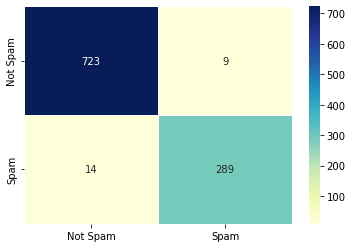

In [24]:
import seaborn as sns
sns.heatmap(cm, linewidth=0.5, cmap='YlGnBu', annot=True, xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'], fmt="n")

<h3>Accuracy of the model using score method

In [26]:
(clf.score(count, targets))*100

98.71856866537718